In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
#랜덤 시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정:",SEED)

시드 고정: 12


In [4]:
#sklearn 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape,y_data.shape)

(506, 13) (506,)


In [5]:
#피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_data_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [6]:
#학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.2,
                                                   shuffle=True,
                                                   random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [10]:
#심층 신경망(MLP)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128,activation='relu',input_dim=num_input))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    model.compile(optimizer='adam',loss='mse',metrics=['mae'])
    
    return model

model = build_model(num_input=13)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1792      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [11]:
#모델 훈련
model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
13/13 - 1s - loss: 297.7196 - mae: 13.1632 - 602ms/epoch - 46ms/step
Epoch 2/100
13/13 - 0s - loss: 96.1800 - mae: 7.2493 - 40ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 65.6452 - mae: 5.7409 - 40ms/epoch - 3ms/step
Epoch 4/100
13/13 - 0s - loss: 63.5079 - mae: 5.6942 - 49ms/epoch - 4ms/step
Epoch 5/100
13/13 - 0s - loss: 63.7535 - mae: 5.5593 - 45ms/epoch - 3ms/step
Epoch 6/100
13/13 - 0s - loss: 62.8564 - mae: 5.6493 - 45ms/epoch - 3ms/step
Epoch 7/100
13/13 - 0s - loss: 63.5867 - mae: 5.5510 - 37ms/epoch - 3ms/step
Epoch 8/100
13/13 - 0s - loss: 62.5254 - mae: 5.7112 - 34ms/epoch - 3ms/step
Epoch 9/100
13/13 - 0s - loss: 59.3343 - mae: 5.4651 - 43ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 58.5740 - mae: 5.4113 - 47ms/epoch - 4ms/step
Epoch 11/100
13/13 - 0s - loss: 63.7587 - mae: 5.4893 - 44ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 64.7207 - mae: 5.7455 - 46ms/epoch - 4ms/step
Epoch 13/100
13/13 - 0s - loss: 61.7839 - mae: 5.7277 - 77ms/epoch - 

In [12]:
#평가
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 23.4059 - mae: 3.2844


[23.405893325805664, 3.284409999847412]

In [14]:
model = build_model(num_input=13)
history = model.fit(X_train,y_train,batch_size=32,epochs=200,
                   validation_split=0.25,verbose=2)


Epoch 1/200
10/10 - 1s - loss: 862.0430 - mae: 22.6675 - val_loss: 90.7701 - val_mae: 7.1920 - 619ms/epoch - 62ms/step
Epoch 2/200
10/10 - 0s - loss: 105.4527 - mae: 7.8446 - val_loss: 76.0237 - val_mae: 6.5158 - 71ms/epoch - 7ms/step
Epoch 3/200
10/10 - 0s - loss: 85.9378 - mae: 6.4703 - val_loss: 62.9976 - val_mae: 5.6425 - 68ms/epoch - 7ms/step
Epoch 4/200
10/10 - 0s - loss: 75.7119 - mae: 6.2259 - val_loss: 57.2833 - val_mae: 5.4334 - 63ms/epoch - 6ms/step
Epoch 5/200
10/10 - 0s - loss: 71.1358 - mae: 5.9337 - val_loss: 56.0128 - val_mae: 5.5353 - 72ms/epoch - 7ms/step
Epoch 6/200
10/10 - 0s - loss: 70.3667 - mae: 5.9943 - val_loss: 55.5117 - val_mae: 5.2356 - 67ms/epoch - 7ms/step
Epoch 7/200
10/10 - 0s - loss: 68.8967 - mae: 5.6475 - val_loss: 54.6573 - val_mae: 5.6844 - 70ms/epoch - 7ms/step
Epoch 8/200
10/10 - 0s - loss: 69.1914 - mae: 6.0424 - val_loss: 54.2649 - val_mae: 5.1627 - 64ms/epoch - 6ms/step
Epoch 9/200
10/10 - 0s - loss: 68.7124 - mae: 5.5990 - val_loss: 53.0141 - 

Epoch 72/200
10/10 - 0s - loss: 27.6570 - mae: 3.8234 - val_loss: 26.8399 - val_mae: 3.4426 - 69ms/epoch - 7ms/step
Epoch 73/200
10/10 - 0s - loss: 29.1853 - mae: 3.8255 - val_loss: 25.7823 - val_mae: 3.5544 - 70ms/epoch - 7ms/step
Epoch 74/200
10/10 - 0s - loss: 27.4389 - mae: 3.8987 - val_loss: 25.4472 - val_mae: 3.3761 - 67ms/epoch - 7ms/step
Epoch 75/200
10/10 - 0s - loss: 26.5871 - mae: 3.7688 - val_loss: 28.7092 - val_mae: 3.5101 - 71ms/epoch - 7ms/step
Epoch 76/200
10/10 - 0s - loss: 29.8918 - mae: 3.8725 - val_loss: 30.7970 - val_mae: 4.5120 - 69ms/epoch - 7ms/step
Epoch 77/200
10/10 - 0s - loss: 31.9783 - mae: 4.1902 - val_loss: 25.0358 - val_mae: 3.6278 - 64ms/epoch - 6ms/step
Epoch 78/200
10/10 - 0s - loss: 26.0445 - mae: 3.7670 - val_loss: 25.1478 - val_mae: 3.6648 - 62ms/epoch - 6ms/step
Epoch 79/200
10/10 - 0s - loss: 24.7249 - mae: 3.6142 - val_loss: 24.6534 - val_mae: 3.5775 - 62ms/epoch - 6ms/step
Epoch 80/200
10/10 - 0s - loss: 24.5564 - mae: 3.6142 - val_loss: 24.244

Epoch 143/200
10/10 - 0s - loss: 17.4571 - mae: 3.0791 - val_loss: 36.5229 - val_mae: 4.8945 - 61ms/epoch - 6ms/step
Epoch 144/200
10/10 - 0s - loss: 18.7854 - mae: 3.1838 - val_loss: 23.8738 - val_mae: 3.4339 - 61ms/epoch - 6ms/step
Epoch 145/200
10/10 - 0s - loss: 13.1333 - mae: 2.6269 - val_loss: 25.1492 - val_mae: 3.6222 - 62ms/epoch - 6ms/step
Epoch 146/200
10/10 - 0s - loss: 17.4612 - mae: 3.1227 - val_loss: 27.6683 - val_mae: 4.0675 - 70ms/epoch - 7ms/step
Epoch 147/200
10/10 - 0s - loss: 17.3232 - mae: 3.0986 - val_loss: 23.0560 - val_mae: 3.2592 - 67ms/epoch - 7ms/step
Epoch 148/200
10/10 - 0s - loss: 19.3124 - mae: 3.0956 - val_loss: 27.1776 - val_mae: 3.2718 - 74ms/epoch - 7ms/step
Epoch 149/200
10/10 - 0s - loss: 13.6808 - mae: 2.7920 - val_loss: 23.3575 - val_mae: 3.4655 - 63ms/epoch - 6ms/step
Epoch 150/200
10/10 - 0s - loss: 13.7858 - mae: 2.7520 - val_loss: 23.1762 - val_mae: 3.3458 - 58ms/epoch - 6ms/step
Epoch 151/200
10/10 - 0s - loss: 15.0835 - mae: 2.9380 - val_los

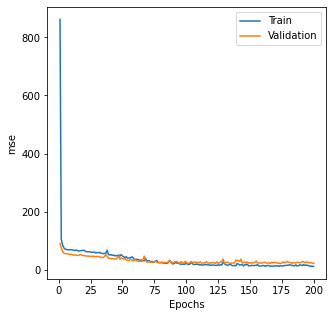

In [16]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),
            history.history['loss'][start-1:total_epoch],
            label='Train')
    plt.plot(range(start,total_epoch+1),
            history.history['val_loss'][start-1:total_epoch],
            label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()
    
plot_loss_curve(total_epoch=200,start=1)

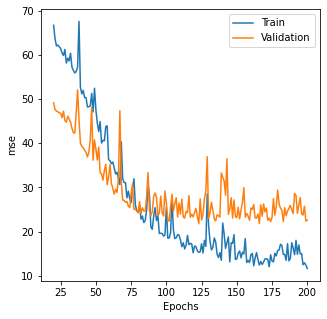

In [25]:
plot_loss_curve(total_epoch=200,start=20)